In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
!ls "/gdrive/My Drive/jeju"

201901-202003.csv  process_data.csv  submission.csv


# 변수 설명¶
- CARD ~ : 카드 이용 지역
- HOM ~ : 카드 사용자 거주지역
- STD_CLSS_NM : 업종명
- SEX_CTGO_CD : 성별(1:남, 2:여)
- FLC : 가구생애주기(1: 1인가구, 2: 영유아자녀가구, 3: 중고생자녀가구, 4: 성인자녀가구, 5: 노년가구)
- CSTMR_CNT : 이용고객수(명)
- AMT : 이용금액(원)
- CNT : 이용건수(건)

In [1]:
import pandas as pd
import numpy as np
file_path = "/gdrive/My Drive/jeju/"
data = pd.read_csv(file_path+'process_data.csv')
data.shape

(24697792, 13)

In [2]:
del data['Unnamed: 0']
data.head(2)

,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,Datetime
0,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4,2019-01
1,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8,2019-01


In [3]:
# 카드 사용지역 별로 나누어보자
# 강원도 지역만 선별
kangwon_df = data.loc[data['CARD_SIDO_NM'] == '강원'] 
kangwon_df.shape

(1230355, 12)

In [4]:
# 강원도에는 카드 사용 횟수가 가장 많은 시군구가 어디인지 알아보기
kangwon_gun_df = kangwon_df.groupby(['CARD_CCG_NM'])['CNT'].sum().sort_values(ascending=False)
kangwon_gun_df

CARD_CCG_NM
원주시    16008790
춘천시    12144927
강릉시    10294621
속초시     5071724
홍천군     3524663
동해시     3414706
삼척시     2024675
평창군     1933807
횡성군     1742398
인제군     1310443
철원군     1188868
정선군     1009942
태백시      922249
양양군      864533
화천군      858550
고성군      754284
영월군      681040
양구군      632309
Name: CNT, dtype: int64

In [5]:
# 시각화하기
kangwon_gun_df = pd.DataFrame(kangwon_gun_df)
kangwon_gun_df.head()

,CNT
CARD_CCG_NM,
원주시,16008790
춘천시,12144927
강릉시,10294621
속초시,5071724
홍천군,3524663


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
 
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum
import matplotlib.font_manager as fm
import matplotlib as mpl
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 33 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144379 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


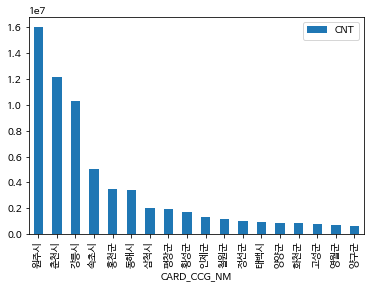

In [7]:

plt.rc('font', family='NanumBarunGothic') 
kangwon_gun_df.plot.bar()

In [10]:
# 업종별로 얼마나 이용건수가 많은지 보기
upjong = kangwon_df.groupby(['STD_CLSS_NM'])['CNT'].sum().sort_values(ascending=False)
upjong = pd.DataFrame(upjong)
upjong.head()

,CNT
STD_CLSS_NM,
체인화 편의점,19112215
한식 음식점업,11634749
슈퍼마켓,7841816
차량용 주유소 운영업,4511515
기타음식료품위주종합소매업,3795489


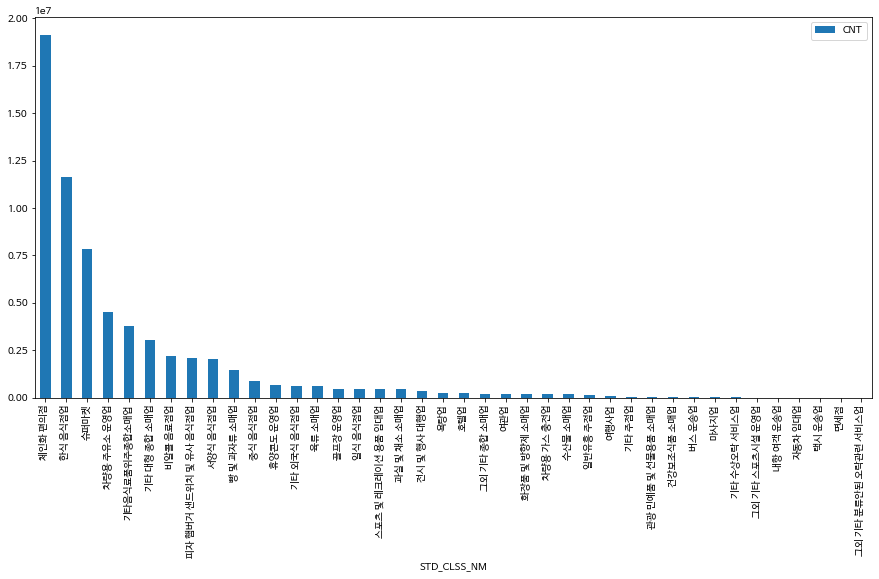

In [14]:

upjong.plot.bar(figsize=(15,7))

In [20]:
# 강원도 지역 내에서 신용카드가 가장 많이 사용된 소매업이 어떤 종류인지 보기
gu_upjong = kangwon_df.groupby(['CARD_CCG_NM','STD_CLSS_NM'])['STD_CLSS_NM'].count().sort_values(ascending=False)
gu_upjong = pd.DataFrame(gu_upjong)
gu_upjong.head(5)

,,STD_CLSS_NM
CARD_CCG_NM,STD_CLSS_NM,
홍천군,슈퍼마켓,29764
원주시,체인화 편의점,24953
강릉시,한식 음식점업,24490
원주시,한식 음식점업,22551
홍천군,한식 음식점업,22543


In [21]:
gu_upjong.columns = ['업종개수']
gu_upjong.head()

,,업종개수
CARD_CCG_NM,STD_CLSS_NM,
홍천군,슈퍼마켓,29764
원주시,체인화 편의점,24953
강릉시,한식 음식점업,24490
원주시,한식 음식점업,22551
홍천군,한식 음식점업,22543


In [23]:
gu_upjong = gu_upjong.reset_index()
gu_upjong.head()

,CARD_CCG_NM,STD_CLSS_NM,업종개수
0,홍천군,슈퍼마켓,29764
1,원주시,체인화 편의점,24953
2,강릉시,한식 음식점업,24490
3,원주시,한식 음식점업,22551
4,홍천군,한식 음식점업,22543


In [27]:
# 가맹점 지역이 '강원'인 데이터
kangwon_df.head()

,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,Datetime
0,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4,2019-01
1,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8,2019-01
2,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6,2019-01
3,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5,2019-01
4,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3,2019-01


In [28]:
# 필요없는 강원 데이터 칼럼 삭제
del kangwon_df['CARD_SIDO_NM']

In [31]:
kangwon_df.columns = ['시군구', '업종', '사용자거주_시도', '사용자거주_시군구', '연령대', '성별', '가구생애주기', '이용고객수(환불사용자포함)', '이용금액(원)', '이용건수(환불사용자제외)',
                      '날짜']
kangwon_df.head(1)
# 2019년 1월에 강릉시 건강보조식품 소매업 가게에서 강원도 강릉시에 사는 1인가구 20대 남성 또는 남성들이 4번 신용카드를 사용한 금액은 31만 1200원

,시군구,업종,사용자거주_시도,사용자거주_시군구,연령대,성별,가구생애주기,이용고객수(환불사용자포함),이용금액(원),이용건수(환불사용자제외),날짜
0,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4,2019-01


In [32]:
kangwon_df['날짜'].unique()
# 코로나 본격적으로 터진건 2월부터..

array(['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03'], dtype=object)

In [35]:
# 업종 종류보기
kangwon_df['업종'].value_counts().sort_values(ascending=False)

한식 음식점업                  203495
체인화 편의점                  193370
슈퍼마켓                     109987
차량용 주유소 운영업               95691
비알콜 음료점업                  62887
피자 햄버거 샌드위치 및 유사 음식점업     57215
서양식 음식점업                  53064
기타 대형 종합 소매업              51074
휴양콘도 운영업                  50330
기타음식료품위주종합소매업             41808
골프장 운영업                   32089
빵 및 과자류 소매업               29726
전시 및 행사 대행업               29282
일식 음식점업                   27175
과실 및 채소 소매업               27154
중식 음식점업                   20714
수산물 소매업                   19714
여관업                       17220
기타 외국식 음식점업               17013
호텔업                       16659
스포츠 및 레크레이션 용품 임대업        15614
여행사업                      11972
육류 소매업                    11221
차량용 가스 충전업                 7688
화장품 및 방향제 소매업              6439
욕탕업                        5489
관광 민예품 및 선물용품 소매업          4428
일반유흥 주점업                   3904
기타 주점업                     1919
그외 기타 종합 소매업               1665
건강보조식품 소매업                 1480
버스 운송업  

In [37]:
hansik_df = kangwon_df[kangwon_df['업종'] == '한식 음식점업']
hansik_df = hansik_df[['업종','이용금액(원)','이용건수(환불사용자제외)','날짜']]
hansik_df.head()

,업종,이용금액(원),이용건수(환불사용자제외),날짜
9053,한식 음식점업,1469600,72,2019-01
9054,한식 음식점업,1560600,80,2019-01
9055,한식 음식점업,97797325,3606,2019-01
9056,한식 음식점업,13402550,444,2019-01
9057,한식 음식점업,64560770,2667,2019-01


In [39]:
hansik_df = hansik_df.set_index('날짜')
hansik_df.head()

,업종,이용금액(원),이용건수(환불사용자제외)
날짜,,,
2019-01,한식 음식점업,1469600,72
2019-01,한식 음식점업,1560600,80
2019-01,한식 음식점업,97797325,3606
2019-01,한식 음식점업,13402550,444
2019-01,한식 음식점업,64560770,2667


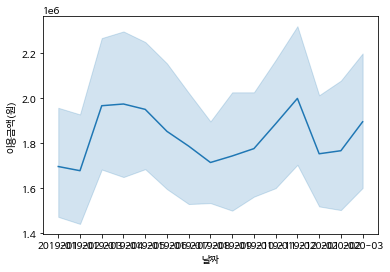

In [40]:
sns.lineplot(data=hansik_df, x=hansik_df.index, y='이용금액(원)')

In [75]:
# 강원도에서 가장 많은 업종 순서에서 상위 7개 업종만 추출
upjong_list = kangwon_df['업종'].value_counts().sort_values(ascending=False).index.tolist()
top_upjong_list = upjong_list[0:7]
top_upjong_list

['한식 음식점업',
 '체인화 편의점',
 '슈퍼마켓',
 '차량용 주유소 운영업',
 '비알콜 음료점업',
 '피자 햄버거 샌드위치 및 유사 음식점업',
 '서양식 음식점업']

In [76]:
# 상위 7개 업종으로만 이루어진 DF만들기
df = pd.DataFrame()
for n in top_upjong_list:
  sub_df = kangwon_df.loc[kangwon_df['업종'] == n]
  df = pd.concat([df, sub_df], axis=0)

In [77]:
df['업종'].value_counts()

한식 음식점업                  203495
체인화 편의점                  193370
슈퍼마켓                     109987
차량용 주유소 운영업               95691
비알콜 음료점업                  62887
피자 햄버거 샌드위치 및 유사 음식점업     57215
서양식 음식점업                  53064
Name: 업종, dtype: int64

In [78]:
df = pd.DataFrame(df.groupby(['업종','날짜'])['이용금액(원)'].sum()).reset_index().set_index('날짜')
df.head()

,업종,이용금액(원)
날짜,,
2019-01,비알콜 음료점업,1120332376
2019-02,비알콜 음료점업,1073460408
2019-03,비알콜 음료점업,1165192751
2019-04,비알콜 음료점업,1126021748
2019-05,비알콜 음료점업,1363504061


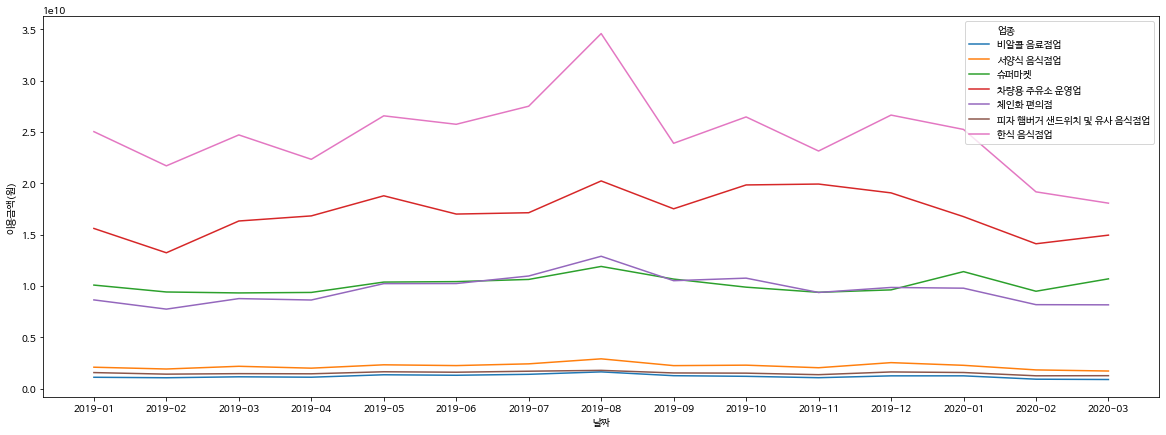

In [79]:
# 상위 업종 7개 시간에 따른 이용금액 변화 추이 시각화
plt.figure(figsize=(20,7))
sns.lineplot(data=df, x=df.index, y='이용금액(원)', hue='업종', ci=None)

In [80]:
# 강원도에서 가장 많은 업종 순서에서 상위 8~14번째개 업종만 추출
upjong_list = kangwon_df['업종'].value_counts().sort_values(ascending=False).index.tolist()
mid_upjong_list = upjong_list[8:15]
mid_upjong_list

['휴양콘도 운영업',
 '기타음식료품위주종합소매업',
 '골프장 운영업',
 '빵 및 과자류 소매업',
 '전시 및 행사 대행업',
 '일식 음식점업',
 '과실 및 채소 소매업']

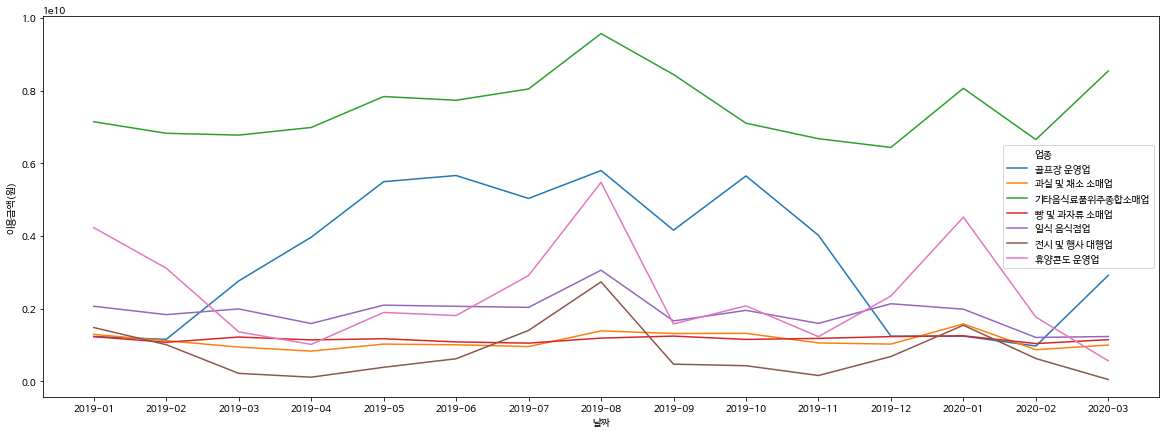

In [81]:
# 상위 8~14개 업종으로만 이루어진 DF만들기
df2 = pd.DataFrame()
for n in mid_upjong_list:
  sub_df = kangwon_df.loc[kangwon_df['업종'] == n]
  df2 = pd.concat([df2, sub_df], axis=0)
df2 = pd.DataFrame(df2.groupby(['업종','날짜'])['이용금액(원)'].sum()).reset_index().set_index('날짜')

plt.figure(figsize=(20,7))
sns.lineplot(data=df2, x=df2.index , y='이용금액(원)', hue='업종', ci=None)

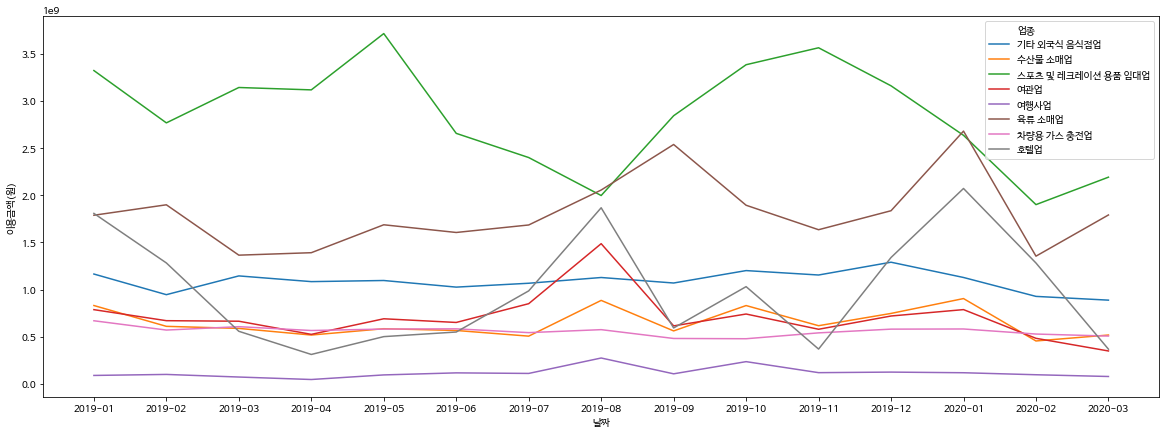

In [83]:
# 강원도에서 가장 많은 업종 순서에서 상위 15~23번째개 업종만 추출
upjong_list = kangwon_df['업종'].value_counts().sort_values(ascending=False).index.tolist()
mid2_upjong_list = upjong_list[16:24]
# 상위 15~23개 업종으로만 이루어진 DF만들기
df3 = pd.DataFrame()
for n in mid2_upjong_list:
  sub_df = kangwon_df.loc[kangwon_df['업종'] == n]
  df3 = pd.concat([df3, sub_df], axis=0)

df3 = pd.DataFrame(df3.groupby(['업종','날짜'])['이용금액(원)'].sum()).reset_index().set_index('날짜')
plt.figure(figsize=(20,7))
sns.lineplot(data=df3, x=df3.index, y='이용금액(원)', hue='업종', ci=None)

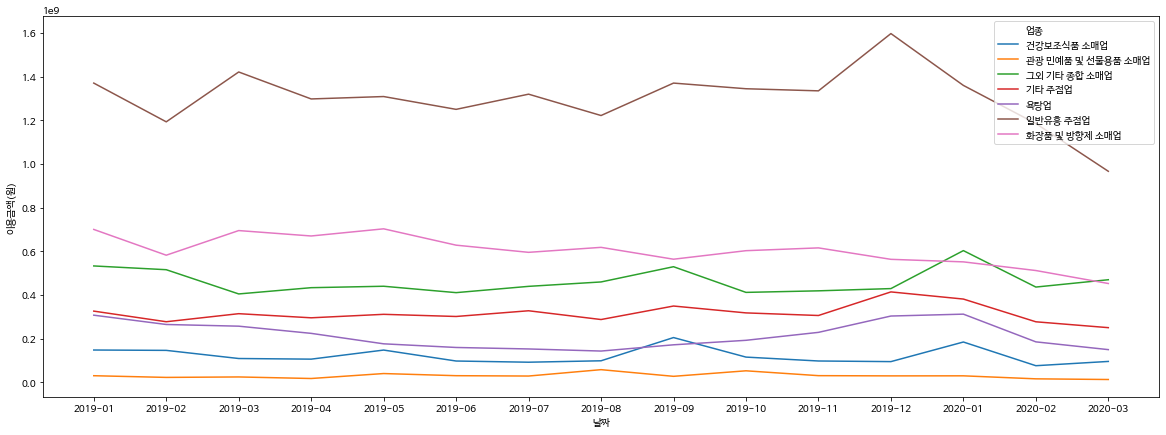

In [84]:
# 강원도에서 가장 많은 업종 순서에서 상위 24~30번째 업종만 추출
upjong_list = kangwon_df['업종'].value_counts().sort_values(ascending=False).index.tolist()
end_upjong_list = upjong_list[24:31]
# 상위 24~30위 업종으로만 이루어진 DF만들기
df4 = pd.DataFrame()
for n in end_upjong_list:
  sub_df = kangwon_df.loc[kangwon_df['업종'] == n]
  df4 = pd.concat([df4, sub_df], axis=0)
df4 = pd.DataFrame(df4.groupby(['업종','날짜'])['이용금액(원)'].sum()).reset_index().set_index('날짜')

plt.figure(figsize=(20,7))
sns.lineplot(data=df4, x=df4.index, y='이용금액(원)', hue='업종', ci=None)

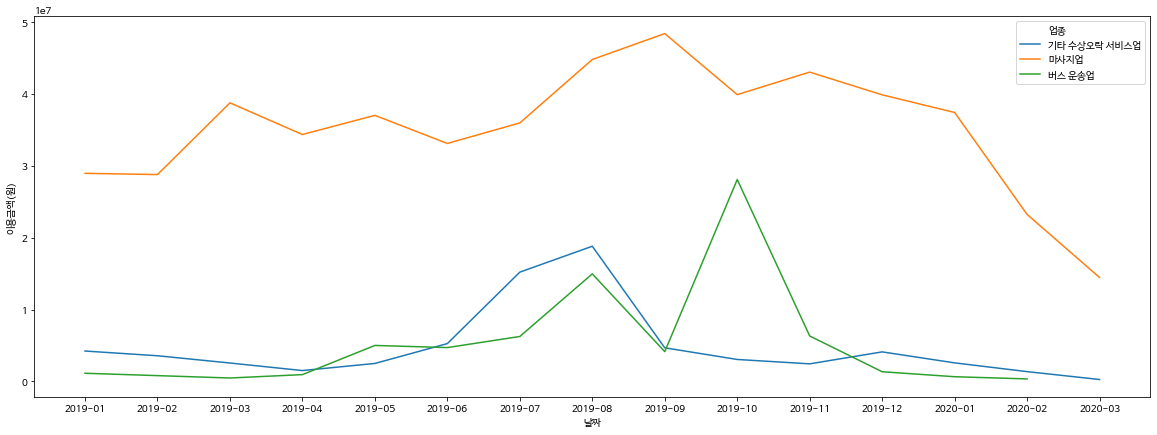

In [85]:
# 강원도에서 가장 많은 업종 순서에서 상위 32~마지막번째 업종만 추출
upjong_list = kangwon_df['업종'].value_counts().sort_values(ascending=False).index.tolist()
end2_upjong_list = upjong_list[31:34]
# 상위 31위~마지막 업종으로만 이루어진 DF만들기
df5 = pd.DataFrame()
for n in end2_upjong_list:
  sub_df = kangwon_df.loc[kangwon_df['업종'] == n]
  df5 = pd.concat([df5, sub_df], axis=0)
df5 = pd.DataFrame(df5.groupby(['업종','날짜'])['이용금액(원)'].sum()).reset_index().set_index('날짜')

plt.figure(figsize=(20,7))
sns.lineplot(data=df5, x=df5.index, y='이용금액(원)', hue='업종', ci=None)

In [104]:
# 강원도에서 가장 많은 업종 순서에서 상위 32~마지막번째 업종만 추출
upjong_list = kangwon_df['업종'].value_counts().sort_values(ascending=False).index.tolist()
end2_upjong_list = upjong_list[34:]
# 상위 31위~마지막 업종으로만 이루어진 DF만들기
df6 = pd.DataFrame()
for n in end2_upjong_list:
  sub_df = kangwon_df.loc[kangwon_df['업종'] == n]
  df6 = pd.concat([df6, sub_df], axis=0)
# 마지막 순위의 업종들은 데이터가 존재하지 않음
# 기간 내 카드 소비가 발생하지 않는 경우.
# 이용자 수가 적어 비식별화 조치로 데이터가 삭제된 경우. (대부분 여기에 해당)

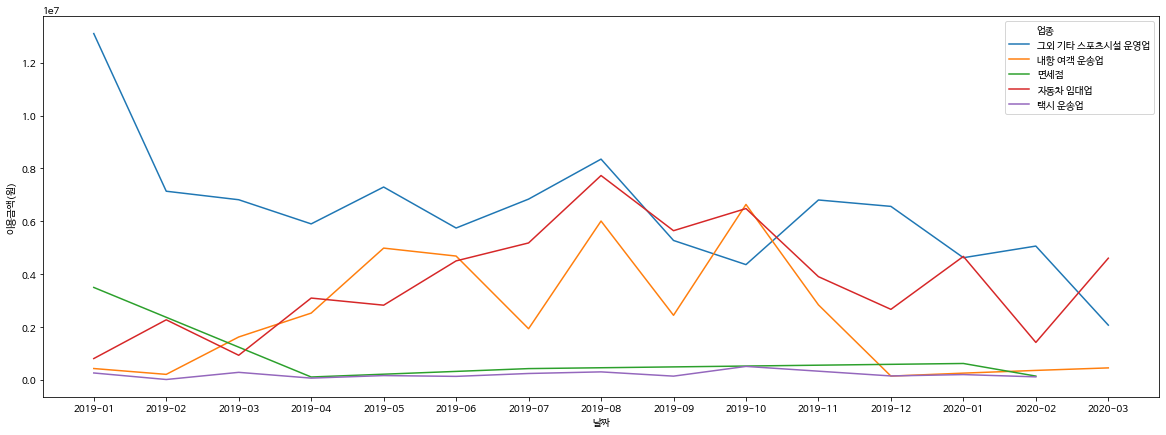

In [113]:
df6 = pd.DataFrame(df6.groupby(['업종','날짜'])['이용금액(원)'].sum()).reset_index().set_index('날짜')
ex = df6.iloc[1:]
plt.figure(figsize=(20,7))
sns.lineplot(data=ex, x=ex.index, y='이용금액(원)', hue='업종', ci=None)

In [114]:
# 이 데이터는 어쩔 것인가...
df6[df6['업종'] == '그외 기타 분류안된 오락관련 서비스업']

,업종,이용금액(원)
날짜,,
2019-05,그외 기타 분류안된 오락관련 서비스업,177000
